<a href="https://colab.research.google.com/github/AKMADOU/projet-1/blob/main/ASSURANCE_AKM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

In [40]:
#simulating Sinistre data

np.random.seed(0) 
mu, sigma = 0.6, 1.5 # mean and standard deviation
Sinistre = 100*578.50*np.random.lognormal(mu, sigma, 100000)
Sinistre=np.array(Sinistre,dtype='int')
print(Sinistre)

[1486131  192114  457583 ...  313289   18285   15333]


In [41]:
#simulating age data
np.random.seed(0) 
Age = np.random.uniform(18,91,100000)
Age=np.array(Age,dtype='int')
Age

array([58, 70, 62, ..., 77, 58, 34])

In [42]:
#simulating the vehicule body
np.random.seed(3) 
veh_body = np.random.uniform(1,4,100000)
veh_body=np.array(veh_body,dtype='int')
veh_body

array([2, 3, 1, ..., 1, 3, 3])

In [43]:
#simulating the vehicule age
np.random.seed(0) 
veh_age = np.random.uniform(1,6,100000)
veh_age=np.array(veh_age,dtype='int')
veh_age

array([3, 4, 4, ..., 5, 3, 2])

In [44]:
#simulating the area
np.random.seed(0) 
area = np.random.uniform(1,4,100000)
area=np.array(area,dtype='int')
area

array([2, 3, 2, ..., 3, 2, 1])

In [45]:
#simulating the gender
np.random.seed(0) 
gender = np.random.uniform(0,2,100000)
gender=np.array(gender,dtype='int')
gender

array([1, 1, 1, ..., 1, 1, 0])

In [46]:
data=pd.DataFrame(list(zip(Age,veh_age,veh_body,area,gender,Sinistre))) 
data.columns =["Age","veh_age","veh_body","area","gender","Sinistre"]
data

,Age,veh_age,veh_body,area,gender,Sinistre
0,58,3,2,2,1,1486131
1,70,4,3,3,1,192114
2,62,4,1,2,1,457583
3,57,3,2,2,1,3038724
4,48,3,3,2,0,1735742
...,...,...,...,...,...,...
99995,70,4,2,3,1,63515
99996,55,3,1,2,1,5028
99997,77,5,1,3,1,313289
99998,58,3,3,2,1,18285


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


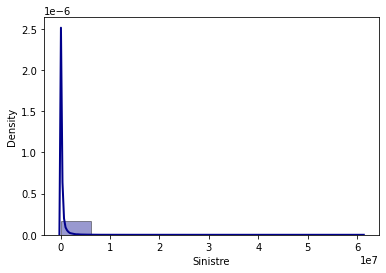

In [47]:
sns.distplot(data['Sinistre'], hist=True, kde=True,
bins=10,
color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 2});

In [48]:
# #Age function to create class category 
# # age class 1: 18-20
# # age class 2: 21-25
# # age class 3: 26-30
# # age class 4: 31-40
# # age class 5: 41-50
# # age class 6: 51-60
# # age class 7: 61-70
# # age class 8: 71-90
# def Age(col):
#     c1=np.zeros(len(col))
#     for i in range(len(col)):
#       if (18<=col[i] and col[i]<21) :
#         c1[i]= '1'
#       if (21<=col[i] and col[i]<25) :
#         c1[i]= '2'
#       if (26<=col[i] and col[i]<30) :
#         c1[i]= '3'
#       if (31<=col[i] and col[i]<40) :
#         c1[i]= '4'
#       if (41<=col[i] and col[i]<=50):
#         c1[i]='5'
#       if (51<=col[i] and col[i]<=60):
#         c1[i]= '6'
#       if (61<=col[i] and col[i]<=70):
#         c1[i]= '7' 
#       if (71<=col[i] and col[i]<=90):
#         c1[i]= '8' 
#     return c1

In [49]:
#vehicule body function to create class category 
def Gender(col):
    c1=np.zeros(len(col))
    for i in range(len(col)):
        if (0<=col[i] and col[i]<1) :
            c1[i]= '0'
        if (1<=col[i] and col[i]<2) :
            c1[i]= '1'
    return c1

In [50]:
#vehicule body function to create class category 
def Veh_body(col):
    c1=np.zeros(len(col))
    for i in range(len(col)):
        if (1<=col[i] and col[i]<2) :
            c1[i]= '1'
        if (2<=col[i] and col[i]<3) :
            c1[i]= '2'
        if (3<=col[i] and col[i]<4) :
            c1[i]= '3'
    return c1

In [51]:
#area function to create class category 
def Areas(col):
    c1=np.zeros(len(col))
    for i in range(len(col)):
        if (1<=col[i] and col[i]<2) :
            c1[i]= '1'
        if (2<=col[i] and col[i]<3) :
            c1[i]= '2'
        if (3<=col[i] and col[i]<4) :
            c1[i]= '3'
    return c1

In [52]:
#vehicle age function to create class category 
def Veh_age(col):
    c1=np.zeros(len(col))
    for i in range(len(col)):
        if (1<=col[i] and col[i]<2) :
            c1[i]= '1'
        if (2<=col[i] and col[i]<3) :
            c1[i]= '2'
        if (3<=col[i] and col[i]<4) :
            c1[i]= '3'
        if (4<=col[i] and col[i]<5) :
            c1[i]= '4'
        if (5<=col[i] and col[i]<6) :
            c1[i]= '5'
    return c1

In [65]:
#feature engineering the age variable to create the age class
#  data['Age_class']=Age(data['Age'])
data['gender']=Gender(data['gender'])
data['veh_body']=Veh_body(data['veh_body'])
data['veh_age']=Veh_age(data['veh_age'])
data['area']=Areas(data['area'])

KeyError: ignored

In [54]:
data.isnull().sum()

Age         0
veh_age     0
veh_body    0
area        0
gender      0
Sinistre    0
dtype: int64

In [55]:
data.columns

Index(['Age', 'veh_age', 'veh_body', 'area', 'gender', 'Sinistre'], dtype='object')

In [56]:
data.head()

,Age,veh_age,veh_body,area,gender,Sinistre
0,58,3.0,2.0,2.0,1.0,1486131
1,70,4.0,3.0,3.0,1.0,192114
2,62,4.0,1.0,2.0,1.0,457583
3,57,3.0,2.0,2.0,1.0,3038724
4,48,3.0,3.0,2.0,0.0,1735742


In [57]:
# Change each column to its appriopriate datatype
num_cols = ['Age', 'Sinistre']
# data_cols=[ 'veh_age', 'veh_body', 'Age_class', 'gender', 'area']
data_cols=[ 'veh_age', 'veh_body',  'gender', 'area']
cat_cols = [col for col in data.columns if col not in num_cols]

for col in data.columns:
  if col  in data_cols:
    data[col] = data[col].astype('category')

# Confirm whether the changes have been applied successfully
# data.info()
cat_cols

['veh_age', 'veh_body', 'area', 'gender']

In [58]:
data.head(5)

,Age,veh_age,veh_body,area,gender,Sinistre
0,58,3.0,2.0,2.0,1.0,1486131
1,70,4.0,3.0,3.0,1.0,192114
2,62,4.0,1.0,2.0,1.0,457583
3,57,3.0,2.0,2.0,1.0,3038724
4,48,3.0,3.0,2.0,0.0,1735742


In [59]:
data['gender']=data['gender'].apply(lambda row: 1 if row=='F' else 0)
binary_columns=data.drop('gender',axis=1).nunique()[data.drop('gender',axis=1).nunique()<3].keys().to_list()
binary_columns


[]

In [60]:
for column in binary_columns:
  data[column]=data[column].apply(lambda row: 1 if row =='Yes' else 0)

In [61]:
data_cat_vars=data[cat_cols].nunique()[data[cat_cols].nunique()>2].keys().to_list()
data_cat_vars_dummies=pd.get_dummies(data=data[data_cat_vars],columns=data_cat_vars,drop_first=True,dummy_na=False)

In [62]:
data=pd.concat([data['gender'],data[binary_columns],data_cat_vars_dummies,data[num_cols]],axis=1)
data.head()

,gender,veh_age_2.0,veh_age_3.0,veh_age_4.0,veh_age_5.0,veh_body_2.0,veh_body_3.0,area_2.0,area_3.0,Age,Sinistre
0,0,0,1,0,0,1,0,1,0,58,1486131
1,0,0,0,1,0,0,1,0,1,70,192114
2,0,0,0,1,0,0,0,1,0,62,457583
3,0,0,1,0,0,1,0,1,0,57,3038724
4,0,0,1,0,0,0,1,1,0,48,1735742


In [63]:
set(data.gender)

{0}

In [24]:
scaler = preprocessing.StandardScaler()

In [25]:
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
scaled_data

,gender,veh_age_2.0,veh_age_3.0,veh_age_4.0,veh_age_5.0,veh_body_2.0,veh_body_3.0,area_2.0,area_3.0,Age_class_1.0,Age_class_2.0,Age_class_3.0,Age_class_4.0,Age_class_5.0,Age_class_6.0,Age_class_7.0,Age_class_8.0,Age,Sinistre
0,0.0,-0.497123,1.989128,-0.496889,-0.500641,1.419267,-0.710334,1.418723,-0.707086,-0.205661,-0.243123,-0.241898,-0.373928,-0.396307,2.499380,-0.396172,-0.614708,0.191342,1.291770
1,0.0,-0.497123,-0.502733,2.012523,-0.500641,-0.704589,1.407789,-0.704859,1.414256,-0.205661,-0.243123,-0.241898,-0.373928,-0.396307,-0.400099,2.524157,-0.614708,0.760097,-0.145856
2,0.0,-0.497123,-0.502733,2.012523,-0.500641,-0.704589,-0.710334,1.418723,-0.707086,-0.205661,-0.243123,-0.241898,-0.373928,-0.396307,-0.400099,2.524157,-0.614708,0.380927,0.149075
3,0.0,-0.497123,1.989128,-0.496889,-0.500641,1.419267,-0.710334,1.418723,-0.707086,-0.205661,-0.243123,-0.241898,-0.373928,-0.396307,2.499380,-0.396172,-0.614708,0.143946,3.016668
4,0.0,-0.497123,1.989128,-0.496889,-0.500641,-0.704589,1.407789,1.418723,-0.707086,-0.205661,-0.243123,-0.241898,-0.373928,2.523296,-0.400099,-0.396172,-0.614708,-0.282620,1.569082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,-0.497123,-0.502733,2.012523,-0.500641,1.419267,-0.710334,-0.704859,1.414256,-0.205661,-0.243123,-0.241898,-0.373928,-0.396307,-0.400099,2.524157,-0.614708,0.760097,-0.288727
99996,0.0,-0.497123,1.989128,-0.496889,-0.500641,-0.704589,-0.710334,1.418723,-0.707086,-0.205661,-0.243123,-0.241898,-0.373928,-0.396307,2.499380,-0.396172,-0.614708,0.049154,-0.353704
99997,0.0,-0.497123,-0.502733,-0.496889,1.997441,-0.704589,-0.710334,-0.704859,1.414256,-0.205661,-0.243123,-0.241898,-0.373928,-0.396307,-0.400099,-0.396172,1.626789,1.091871,-0.011233
99998,0.0,-0.497123,1.989128,-0.496889,-0.500641,-0.704589,1.407789,1.418723,-0.707086,-0.205661,-0.243123,-0.241898,-0.373928,-0.396307,2.499380,-0.396172,-0.614708,0.191342,-0.338976


In [ ]:
# scale_data_=scaler.fit_transform(np.array(data['Age']).reshape(-1,1))
# data['Age']=scale_data_

In [ ]:
# data.rename(columns={'veh_age_1.0': 'agev_1','veh_age_2.0':'agev_2','veh_age_3.0':'agev_3','veh_age_4.0':'agev_4','veh_age_5.0':'agev_5',
#                     'veh_body_1.0':'body_1','veh_body_2.0':'body_2','veh_body_3.0':'body_3', 'area_1.0':'area_1','area_2.0':'area_2','area_3.0':'area_3',
#                      'gender_1':'M','gender_2':'F','Age_class_0.0':'Age','Age_class_1.0':'Age1','Age_class_2.0':'Age2','Age_class_3.0':'Age3','Age_class_4.0':'Age4','Age_class_5.0':'Age5',
#                      'Age_class_6.0':'Age6','Age_class_7.0':'Age7','Age_class_8.0':'Age8'
#                      })

In [ ]:
# data.rename(columns={'veh_age_1.0': 'agev_1','veh_age_2.0':'agev_2','veh_age_3.0':'agev_3','veh_age_4.0':'agev_4','veh_age_5.0':'agev_5',
#                     'veh_body_1.0':'body_1','veh_body_2.0':'body_2','veh_body_3.0':'body_3', 'area_1.0':'area_1','area_2.0':'area_2','area_3.0':'area_3',
#                      'gender_1':'M','gender_2':'F'
#                      })

In [26]:
# cols = list(scaled_data.columns[0:-1])
# X, y = scaled_data[cols], scaled_data['Claim Amount']
X=scaled_data.drop('Sinistre',axis=1)
Y=scaled_data['Sinistre']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((80000, 18), (20000, 18))

In [27]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config 

In [28]:
set_config(print_changed_only=False) 
 
rfr = RandomForestRegressor()
print(rfr)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [29]:
rfr.fit(X_train,Y_train)
score = rfr.score(X_train,Y_train)
print("R-squared:", score) 

R-squared: 0.002455432995612572


In [30]:
# rfr.fit(X_train,Y_train)
score = rfr.score(X_test,Y_test)
print("R-squared:", score) 

R-squared: -0.0022936486711220283


In [31]:
ypred = rfr.predict(X_test)

mse = mean_squared_error(Y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

MSE:  1.259982558781313
RMSE:  0.6299912793906565


In [32]:
ypred_rf = scalery.inverse_transform(ypred.reshape(-1,1))
ytest_rf = scalery.inverse_transform(Y_test.reshape(-1,1))

NameError: ignored

In [ ]:
history = model.fit(X_train, Y_train, validation_split=0.1, batch_size=25, epochs=5)


Epoch 1/5


ValueError: ignored

In [ ]:
results= model.evaluate(X_test, Y_test )
for i in range(len(model.metrics_names)):
      print(model.metrics_names[i]," : ", results[i])

625/625 [==============================] - 2s 3ms/step - loss: 1978.4500 - mae: 39.2843 - mse: 1978.4500
loss  :  1978.449951171875
mae  :  39.28433609008789
mse  :  1978.449951171875


In [ ]:
import numpy as np
A=np.sqrt(results[2])
A

44.47977013398198

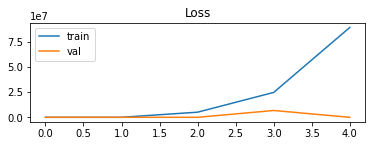

In [ ]:
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()

En abscist nous avons le nombre d'itération et en ordonneé les erreux

In [ ]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression 

In [ ]:
X=data.iloc[:,2:]
y=data.iloc[:,1]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.8, random_state=0)
X_train.shape, X_test.shape,Y_train.shape, Y_test.shape

((20000, 13), (80000, 13), (20000,), (80000,))

In [ ]:
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X_train, Y_train)
y_pred=regressor.predict(X_test)

In [ ]:
#Model evalution

print('R^2:',metrics.r2_score(Y_test,y_pred))
print('MAE:',metrics.mean_absolute_error(Y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

R^2: 1.0
MAE: 0.0
RMSE: 0.0


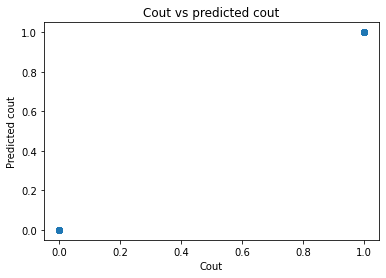

In [ ]:
plt.scatter(Y_test,y_pred)
plt.xlabel("Cout")
plt.ylabel("Predicted cout")
plt.title("Cout vs predicted cout")
plt.show()

In [ ]:
# create a regressor object
model = RandomForestRegressor(max_depth=250, random_state=4) 
model.fit(X_train, Y_train)
pred=model.predict(X_test)
# print(model.get_params())

In [ ]:
#Model evalution

print('R^2:',metrics.r2_score(Y_test,pred))
print('MAE:',metrics.mean_absolute_error(Y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,pred)))

R^2: 1.0
MAE: 0.0
RMSE: 0.0


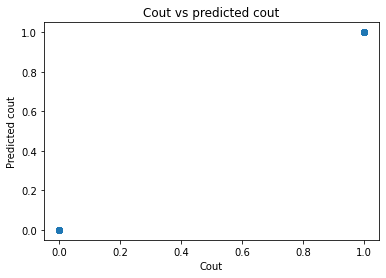

In [ ]:
plt.scatter(Y_test,pred)
plt.xlabel("Cout")
plt.ylabel("Predicted cout")
plt.title("Cout vs predicted cout")
plt.show()

In [ ]:
# create a regressor object
model1 = LinearRegression() 
model1.fit(X_train, Y_train)
pred1=model1.predict(X_test)

In [ ]:
#Model evalution

print('R^2:',metrics.r2_score(Y_test,pred1))
print('MAE:',metrics.mean_absolute_error(Y_test,pred1))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,pred1)))

R^2: 1.0
MAE: 1.935630544736e-14
RMSE: 4.409238728727241e-14


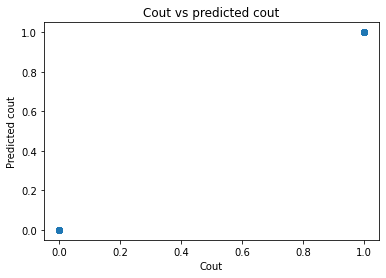

In [ ]:
plt.scatter(Y_test,pred1)
plt.xlabel("Cout")
plt.ylabel("Predicted cout")
plt.title("Cout vs predicted cout")
plt.show()

In [ ]:
models = pd.DataFrame({
    'Model': ['Decision Tree Regressor', 'Random Forest Regressor','Linear Regression'],
    'mse(%)': [metrics.mean_squared_error(Y_test, y_pred)*100, metrics.mean_absolute_error(Y_test,pred)*100, results[2]*100]})
models.sort_values(by='mse(%)', ascending=True)

,Model,mse(%)
0,Decision Tree Regressor,0.000000
1,Random Forest Regressor,0.000000
2,Linear Regression,197844.995117


In [ ]:
models = pd.DataFrame({
    'Model': ['Decision Tree Regressor', 'Random Forest Regressor','Linear Regression','Reseaux de neurones'],
    'mse(%)': [metrics.mean_absolute_error(Y_test, y_pred)*100, metrics.mean_squared_error(Y_test,pred)*100, metrics.mean_squared_error(Y_test,pred1),results[2]*100]})
models.sort_values(by='mse(%)', ascending=True)

,Model,mse(%)
0,Decision Tree Regressor,0.000000e+00
1,Random Forest Regressor,0.000000e+00
2,Linear Regression,1.944139e-27
3,Reseaux de neurones,1.978450e+05
